In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [4]:
df=pd.read_csv("empl.csv")
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [6]:
df.shape

(22, 6)

In [8]:
df.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

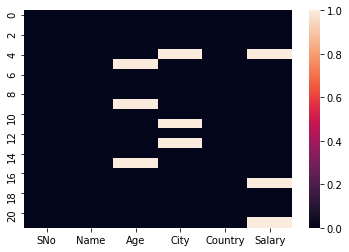

In [10]:
sbn.heatmap(df.isnull())

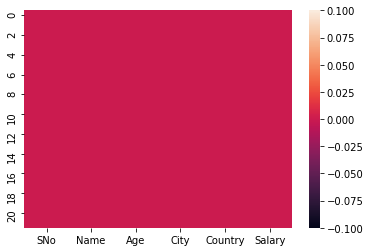

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Salary'].fillna(df['Salary'].mean(),inplace=True)
df['City'].fillna(method='ffill',inplace=True)
sbn.heatmap(df.isnull())

In [14]:
df.describe()

,SNo,Age,Salary
count,22.000000,22.000000,22.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,6.642689,21433.835262
min,1.000000,22.000000,3900.000000
25%,6.250000,27.250000,11666.000000
50%,12.500000,31.500000,33739.947368
75%,17.750000,34.000000,49633.000000
max,23.000000,50.000000,67666.000000


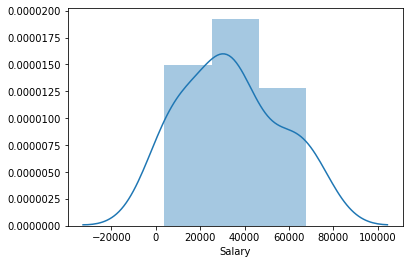

In [15]:
sbn.distplot(df['Salary'])

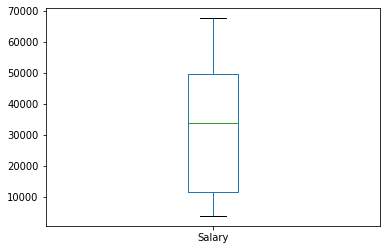

In [16]:
df['Salary'].plot.box()

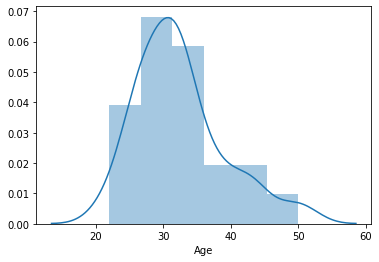

In [20]:
sbn.distplot(df['Age'])

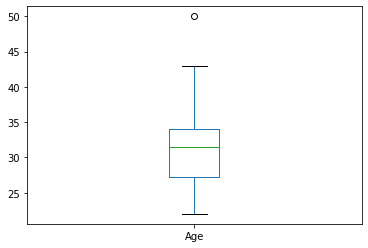

In [21]:
df['Age'].plot.box()

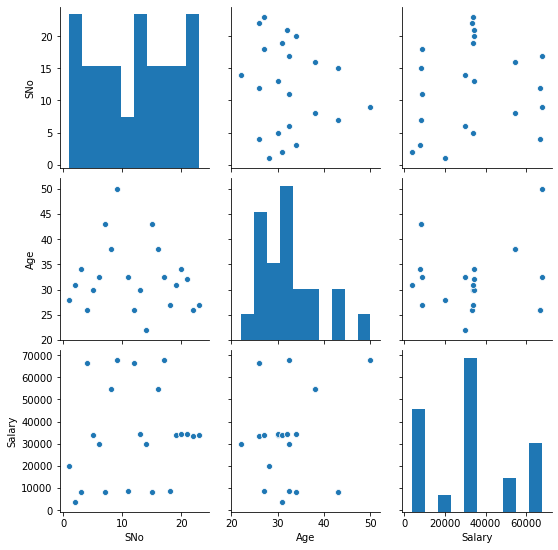

In [22]:
sbn.pairplot(df)

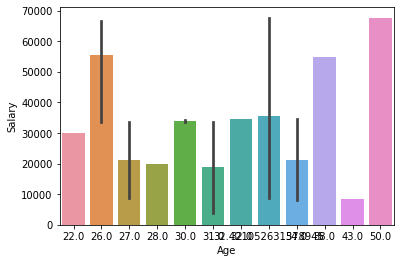

In [24]:
sbn.barplot(x='Age',y='Salary',data=df)
plt.show()

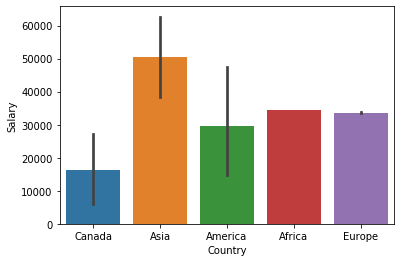

In [25]:
sbn.barplot(x='Country',y='Salary',data=df)
plt.show()

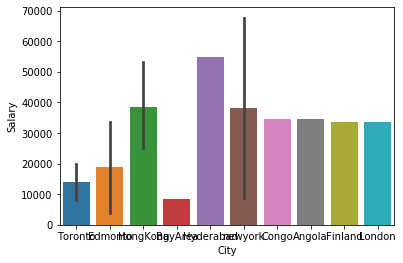

In [26]:
sbn.barplot(x='City',y='Salary',data=df)

In [27]:
df.skew()

SNo      -0.042047
Age       1.034732
Salary    0.308034
dtype: float64

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])
df['Country']=le.fit_transform(df['Country'])

In [29]:
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,8,3,20000.000000
1,2,Lee,31.0,3,3,3900.000000
2,3,Dave,34.0,8,3,8000.000000
3,4,Anik,26.0,5,2,66672.000000
4,5,kamal,30.0,5,1,33739.947368


In [33]:
x=df.drop(columns=['SNo','Name','Salary'])
y=df['Salary']

In [34]:
x

,Age,City,Country
0,28.000000,8,3
1,31.000000,3,3
2,34.000000,8,3
3,26.000000,5,2
4,30.000000,5,1
5,32.421053,5,2
6,43.000000,1,1
7,38.000000,6,2
8,50.000000,9,1
9,32.421053,9,1


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=-10
for r_state in range(42,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state= r_state
print()        
print("max r2 score corresponding to   ",final_r_state, ' is ',max_r_score)     

r2_score corresponding to random state:  42  is  -0.8114552411027716
r2_score corresponding to random state:  43  is  -0.7389242742760525
r2_score corresponding to random state:  44  is  -0.3688256005318924
r2_score corresponding to random state:  45  is  -3.1170407054722293
r2_score corresponding to random state:  46  is  -0.40579969866507826
r2_score corresponding to random state:  47  is  -0.608417559561961
r2_score corresponding to random state:  48  is  -0.8346261205731098
r2_score corresponding to random state:  49  is  -0.20427123687986115
r2_score corresponding to random state:  50  is  -1.2636025733832486
r2_score corresponding to random state:  51  is  -0.5520188097074636
r2_score corresponding to random state:  52  is  -0.8677405433374108
r2_score corresponding to random state:  53  is  -0.05612037440633855
r2_score corresponding to random state:  54  is  -0.5606305378120895
r2_score corresponding to random state:  55  is  -0.1782394245342731
r2_score corresponding to random

In [46]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([  -0.48004823,   -0.57458259,   -0.51835883,   -0.32850087,
       -141.10779424])

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=102,test_size=0.20)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is ",r2_score(y_test,y_pred))

RMSE is  20047.7392773914
r2_score is  -0.0052891386847802035
